In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
datapath = '/content/drive/MyDrive/Colab Notebooks/fire_nrt_V1_96617.csv'
nrt_data = pd.read_csv(datapath)

In [ ]:
nrt_data

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-32.58616,123.39582,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.37853,115.94735,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.21827,115.75078,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


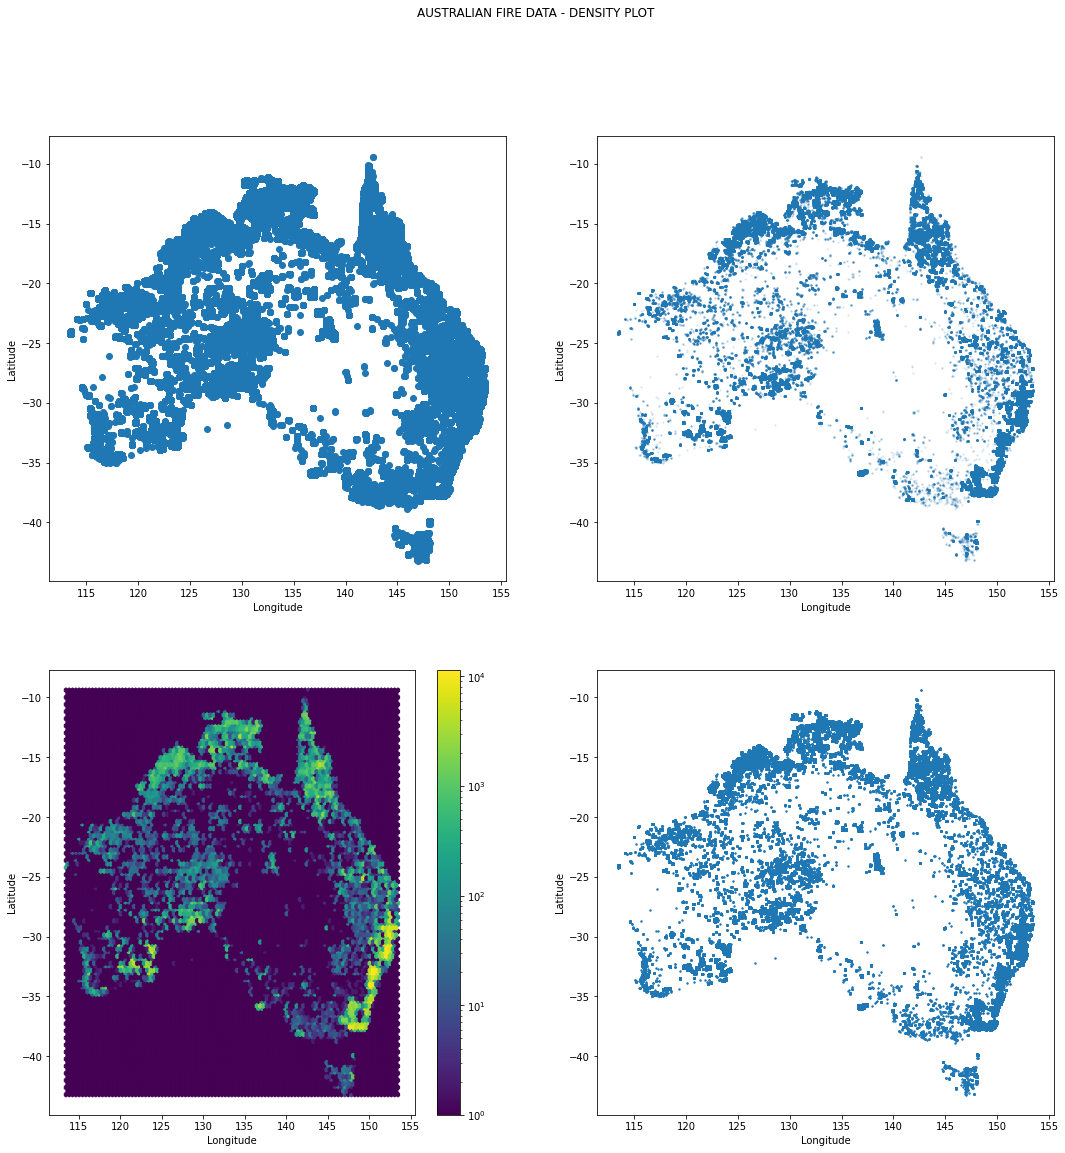

In [ ]:
x = nrt_data.longitude
y = nrt_data.latitude
plt.figure(figsize=(18,18))

#plot1:
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#plot2
# using the alpha argument to adjust the transparency of the dots
plt.subplot(2,2,2)
plt.scatter(x, y, marker='.', s = 8, alpha = 0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#plot3
# Followed this to learn more aout hexbin https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
plt.subplot(2,2,3)
plt.hexbin(x, y, bins='log',gridsize=100)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#plot4
# Got an idea of sampling the data from https://towardsdatascience.com/how-to-sample-a-dataframe-in-python-pandas-d18a3187139b
plt.subplot(2,2,4)
subsample = nrt_data.sample(frac=0.8)
plt.scatter(subsample.longitude, subsample.latitude, marker='o', s = 2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")


plt.suptitle("AUSTRALIAN FIRE DATA - DENSITY PLOT")
plt.show()



From the above graphs, we can observe that northern and south-eastern parts of Australia are mostly affected by the fires. From the Hexbin plot, it is much more clear that the south-eastern parts of Australia is majorly affected.

**Visualizing class membership**

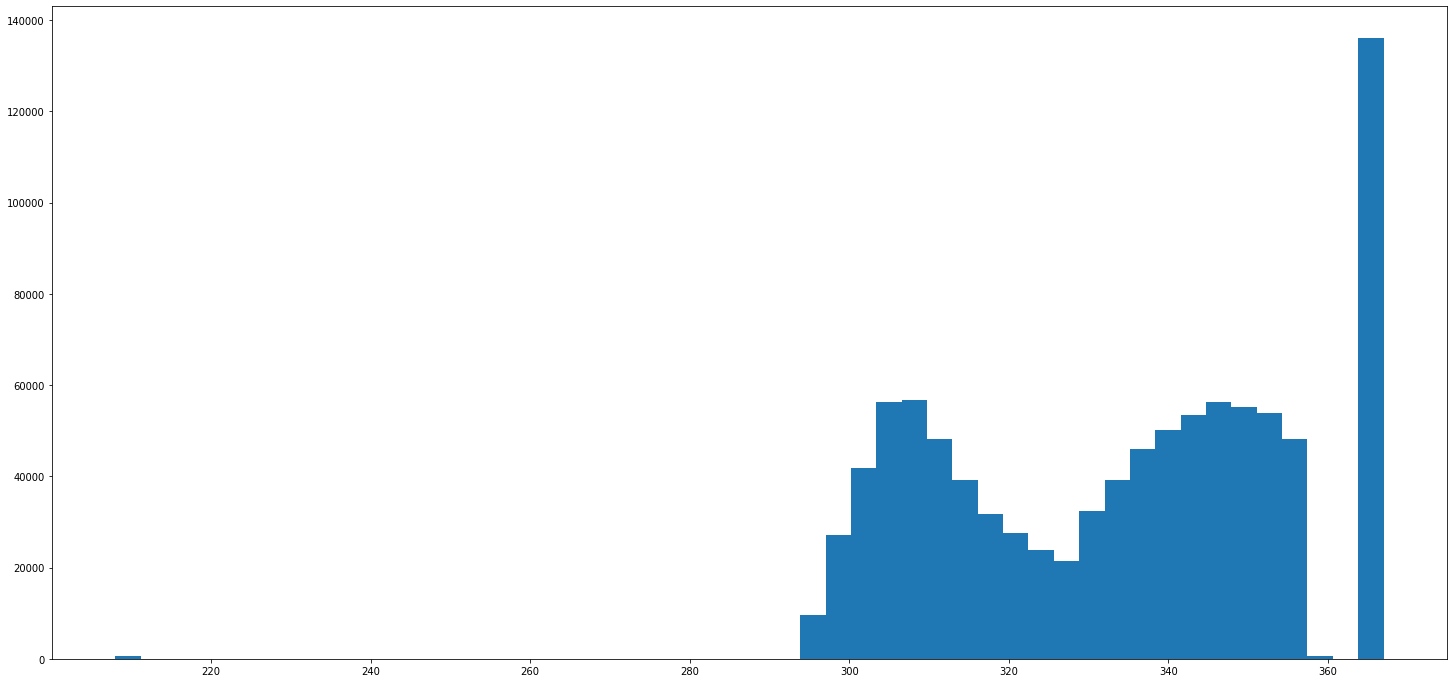

In [ ]:
plt.figure(figsize=(25,12))
plt.hist(nrt_data.bright_ti4, bins =50)
plt.show()

136180
136180


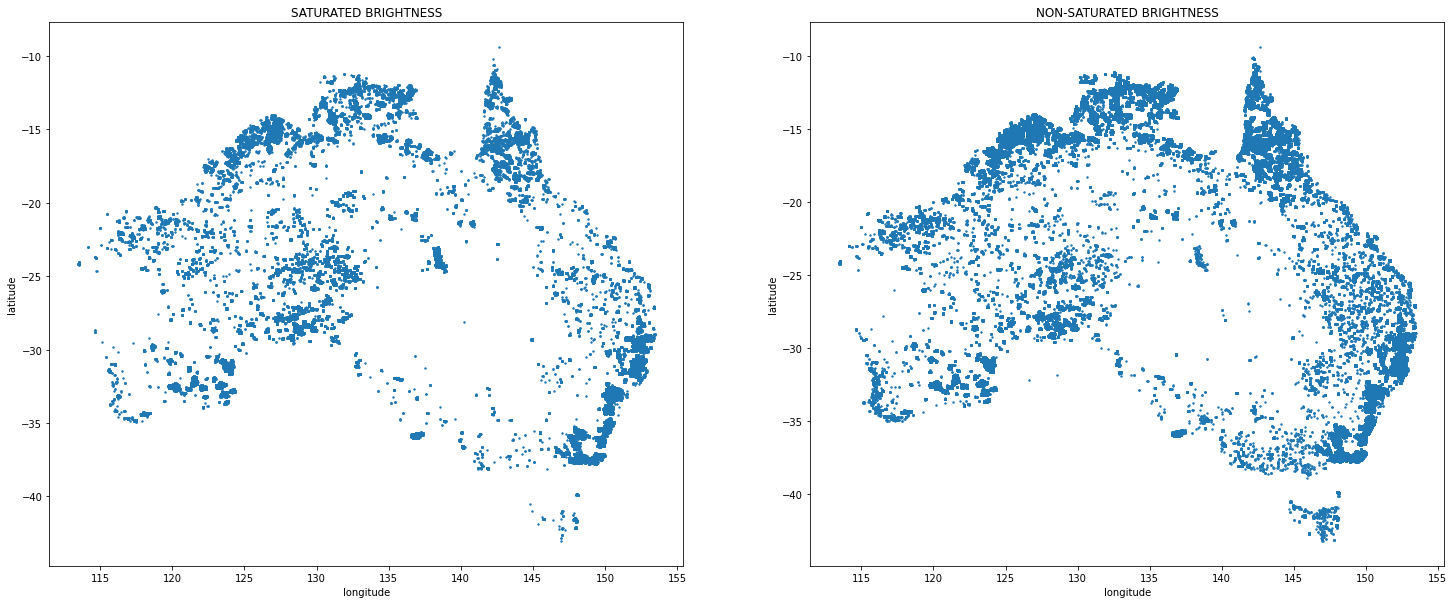

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
latitude_saturated = nrt_data.latitude[nrt_data.bright_ti4 > 359]
longitude_saturated = nrt_data.longitude[nrt_data.bright_ti4 > 359]
saturated_plot = plt.scatter(longitude_saturated, latitude_saturated, s=2)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("SATURATED BRIGHTNESS")

#Just to know the saturation point, we tried plotting the data with temperatures from 351 and above and we figured that the length of the data remains constant from 359 and above (i.e., 136180)
print(len(latitude_saturated))
print(len(longitude_saturated))


plt.subplot(1,2,2)
latitude_nonsaturated = nrt_data.latitude[nrt_data.bright_ti4 <= 359]
longitude_nonsaturated = nrt_data.longitude[nrt_data.bright_ti4 <= 359]
nonsaturated_plot = plt.scatter(longitude_nonsaturated, latitude_nonsaturated, s=2)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("NON-SATURATED BRIGHTNESS")

plt.show()


Non-saturated plot is more densely distributed than saturated plot.

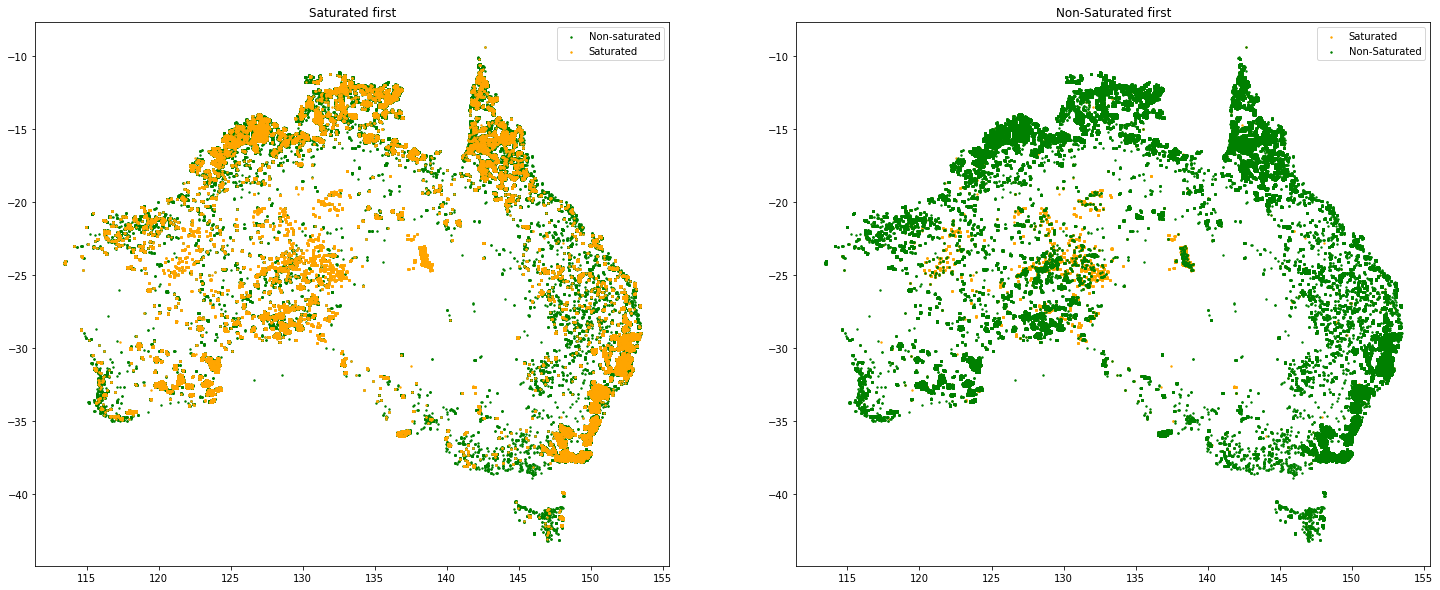

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.scatter(longitude_nonsaturated, latitude_nonsaturated, s = 2, color ="green")
plt.scatter(longitude_saturated, latitude_saturated, s = 2 , color = "orange" )
plt.legend(['Non-saturated', 'Saturated'])
plt.title("Saturated first")

plt.subplot(1,2,2)
plt.scatter(longitude_saturated, latitude_saturated, s = 2 , color = "orange")
plt.scatter(longitude_nonsaturated, latitude_nonsaturated, s = 2, color ="green")
plt.legend(['Saturated', 'Non-Saturated'])
plt.title("Non-Saturated first")

plt.show()

From the plots above, we can observe that the saturated points are lesser than the non saturated temperatures. From the left plot, we can see that, eventhough we tried plotting the saturated on top of the non-saturated temperatures, the non-sautrated points are clearly visible whereas the on the right plot, we weren't able to observe the saturated points when plotted the other way around.

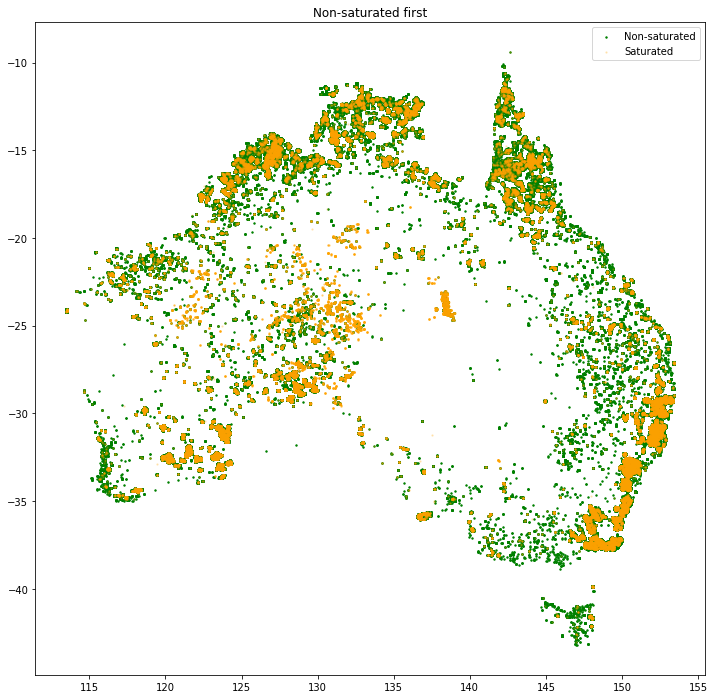

In [ ]:
#Got the idea of comparing the geographical plots using this https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/visualization/visualizing_geographic_data.html

plt.figure(figsize=(12,12))

plt.scatter(longitude_nonsaturated, latitude_nonsaturated, s = 2, color ="green")
plt.scatter(longitude_saturated, latitude_saturated, s = 2 , color = "orange", alpha = 0.2 )
plt.legend(['Non-saturated', 'Saturated'])
plt.title("Saturated first")
plt.show()


In order to compare both the distributions, from both the plots above, we can say that the saturated brightness values should be plotted on top of the non saturated points and may be in order to make the fair distribution, we can just decrease the alpha value to reduce the transparency or the visibility saturation points as they are plotted on top and so are distinguishable by default.

In [ ]:
import pandas as pd
df = pd.read_csv('Data Sets/House Prices/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
# Categorical features are: Street, city, statezip, country, bedrooms, bathrooms, floors, waterfront, yr_built, yr_renovated, view, condition
cat_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
# cat_features = ['street', 'city', 'statezip', 'country']

In [ ]:
# Continuous features are: sqft_living, sqft_lot, sqft_above, sqft_basement
cont_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
# cont_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

In [ ]:
df['price'].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [ ]:
# 0 is not a valid sales price
df = df.drop(df[df.price == 0.0].index)
df.price.value_counts()

300000.0     42
400000.0     31
600000.0     29
440000.0     29
450000.0     29
             ..
325900.0      1
684680.0      1
609900.0      1
1635000.0     1
220600.0      1
Name: price, Length: 1740, dtype: int64

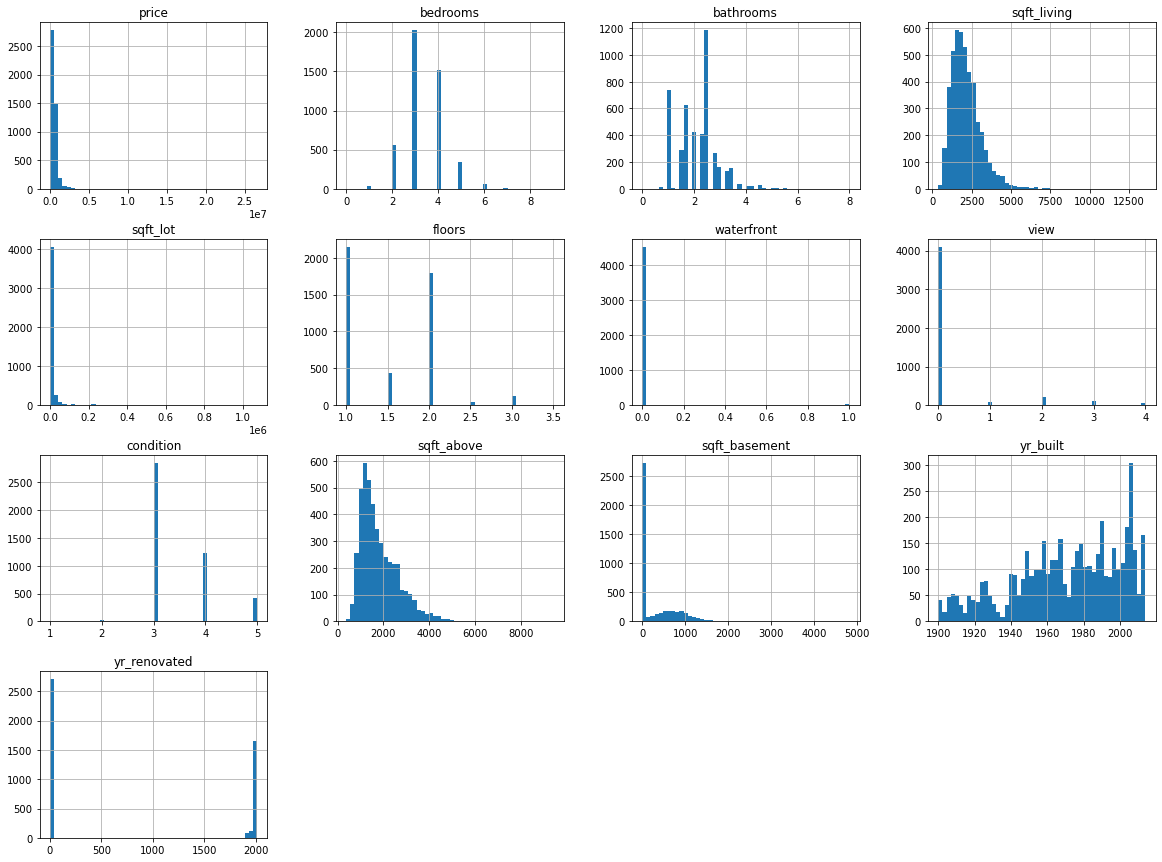

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

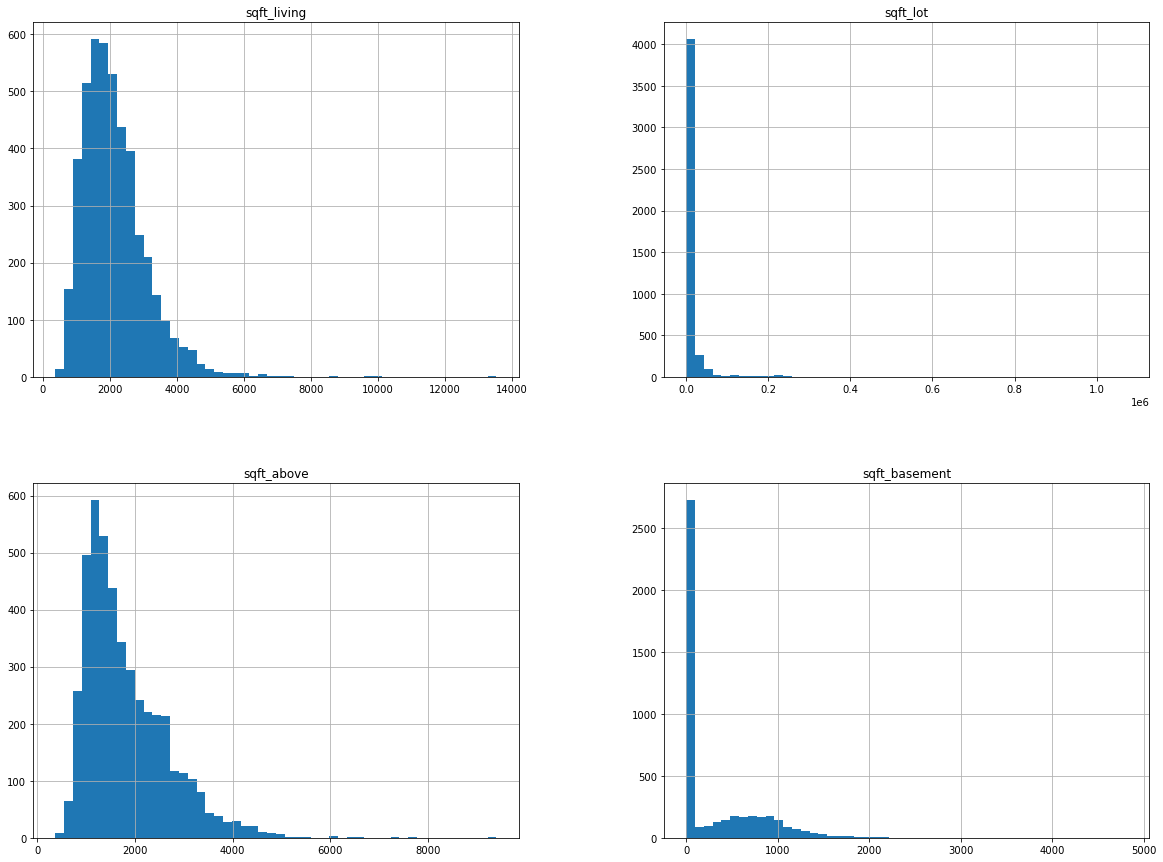

In [ ]:
# Univariate distribution of all the continuous features as histograms
df.hist(column = cont_features, bins=50, figsize=(20,15))
plt.show()

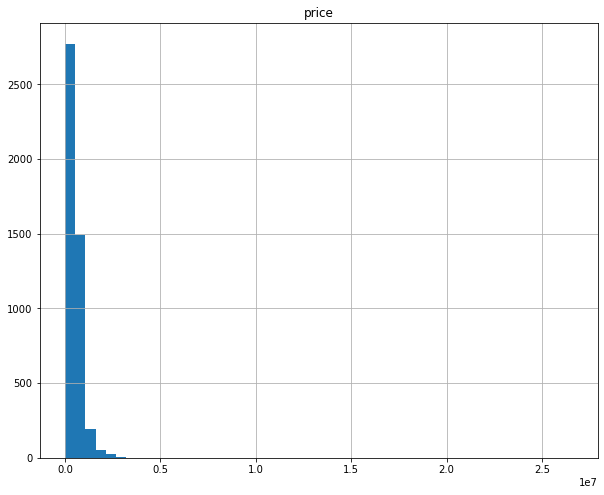

In [ ]:
# Univariate dirstribution of price (target variable)
df.hist(column = ['price'], bins=50, figsize=(10,8))
plt.show()

Noticed that there are a lot of 0's for sqft basement and sqft_lot. No special treatment should be required as they could be valid inputs since there are houses with no basement or lot.
Another thing to note are a couple of features with outliers that are magnitudes greater than the rest of the data set. It's best to remove them so as not to skew the predictions.


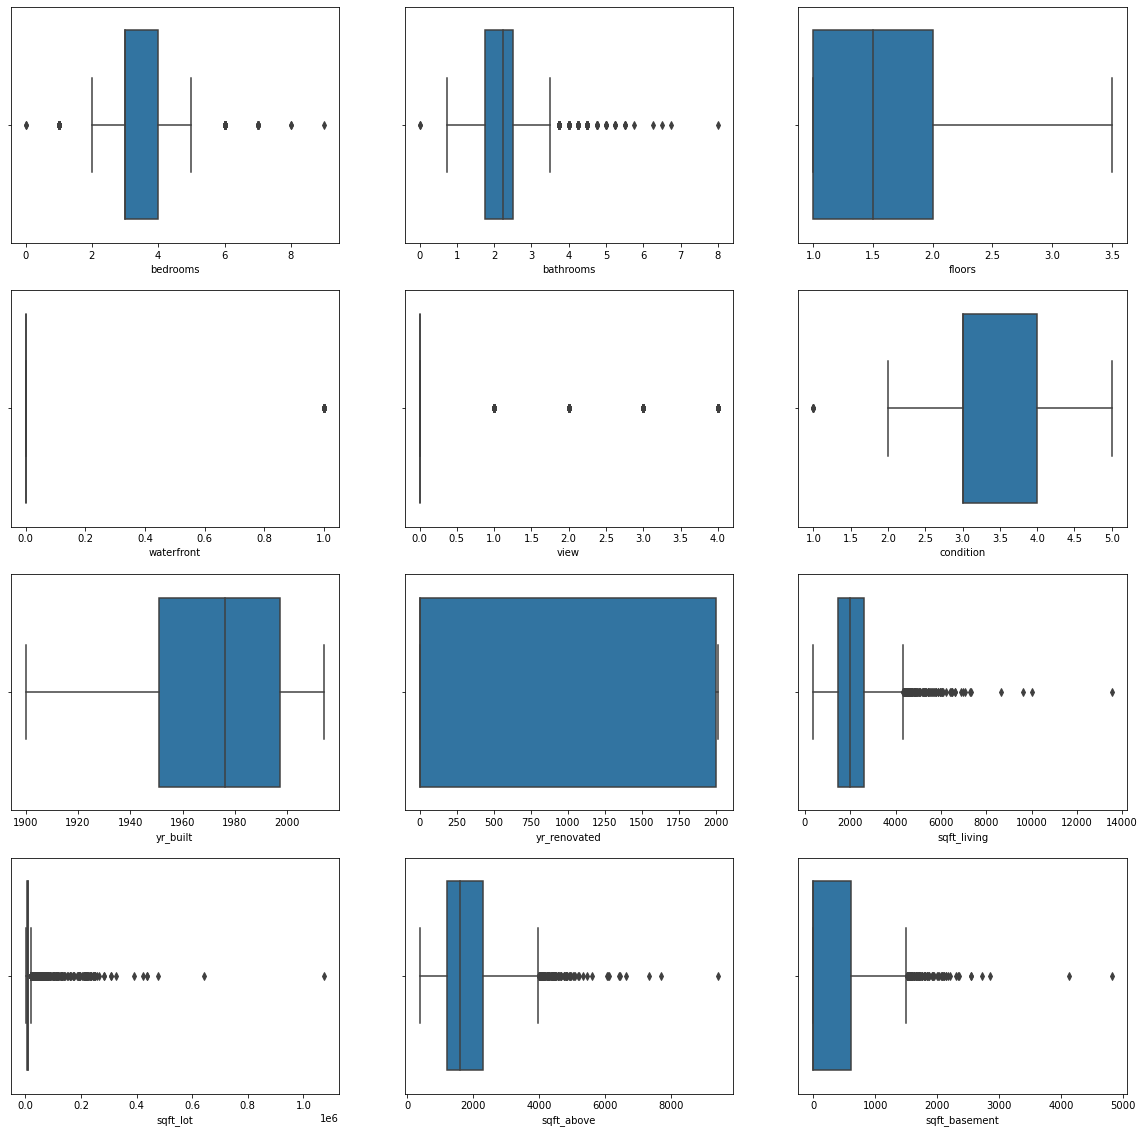

In [ ]:
# Plotting a boxplot of all the numerical features to get a better sense of the outliers
num_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
figure = plt.figure(figsize=(20,20))
i=1

for col in num_features:
    sp = figure.add_subplot(4,3,i)
    # df.boxplot(column=col)
    sns.boxplot(x = df[col])
    i+=1
plt.show()

In [ ]:
# Removing outliers via Z score
from scipy import stats
import numpy as np

print(df.size)

def remove_outliers(df,columns,threshold=3):
    new_df = df
    for col in columns:
        z_score = np.abs(stats.zscore(df[col]))
        new_df = new_df.drop(new_df[np.abs(stats.zscore(new_df[col])) > threshold].index)
    return new_df

new_df = remove_outliers(df, num_features)

print(new_df.size)

81918
74484


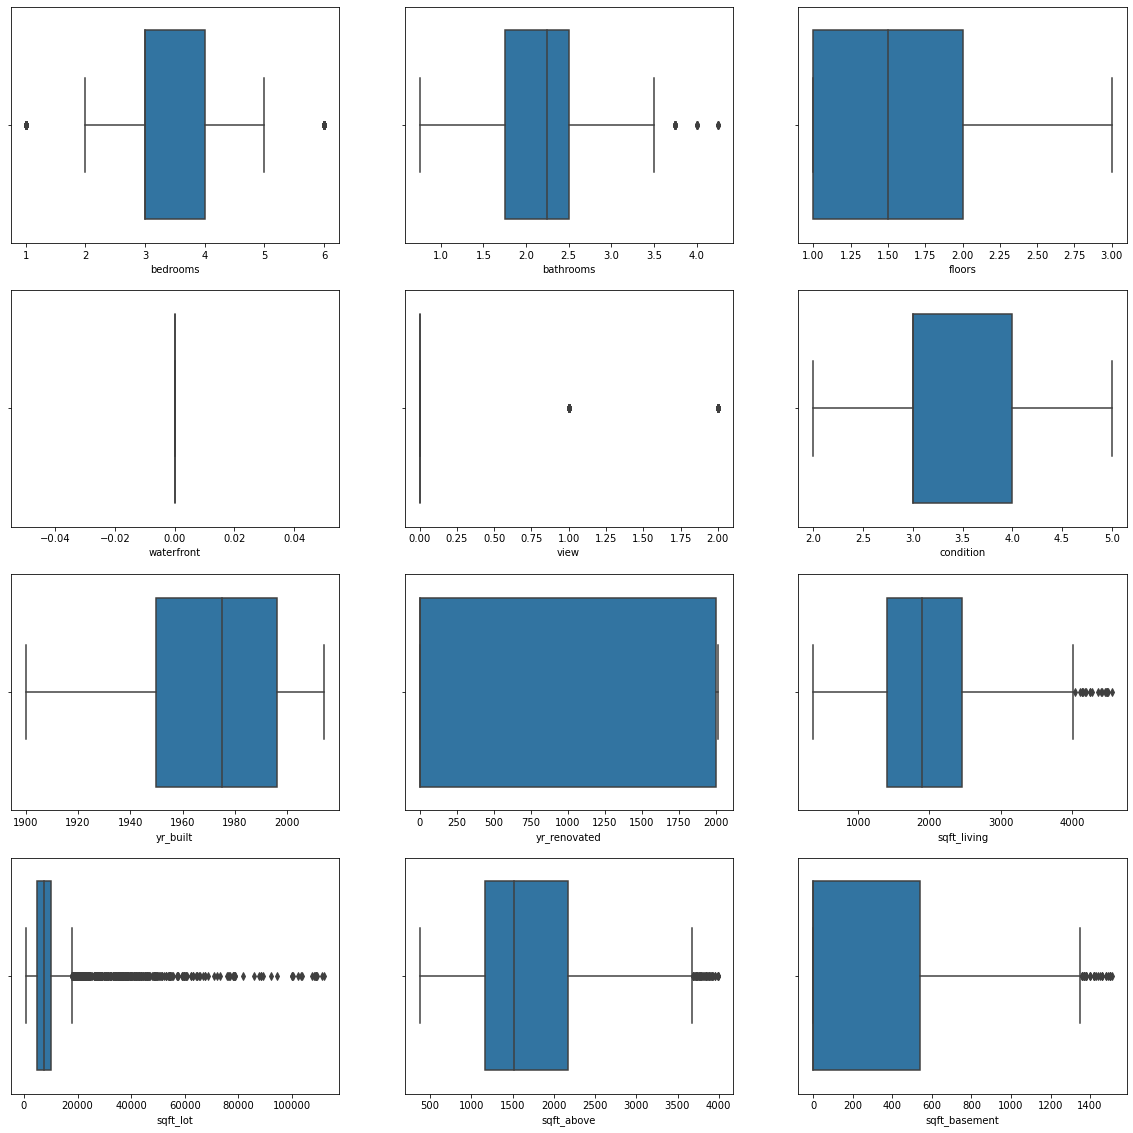

In [ ]:
figure = plt.figure(figsize=(20,20))
i=1

for col in num_features:
    sp = figure.add_subplot(4,3,i)
    # df.boxplot(column=col)
    sns.boxplot(x = new_df[col])
    i+=1
plt.show()

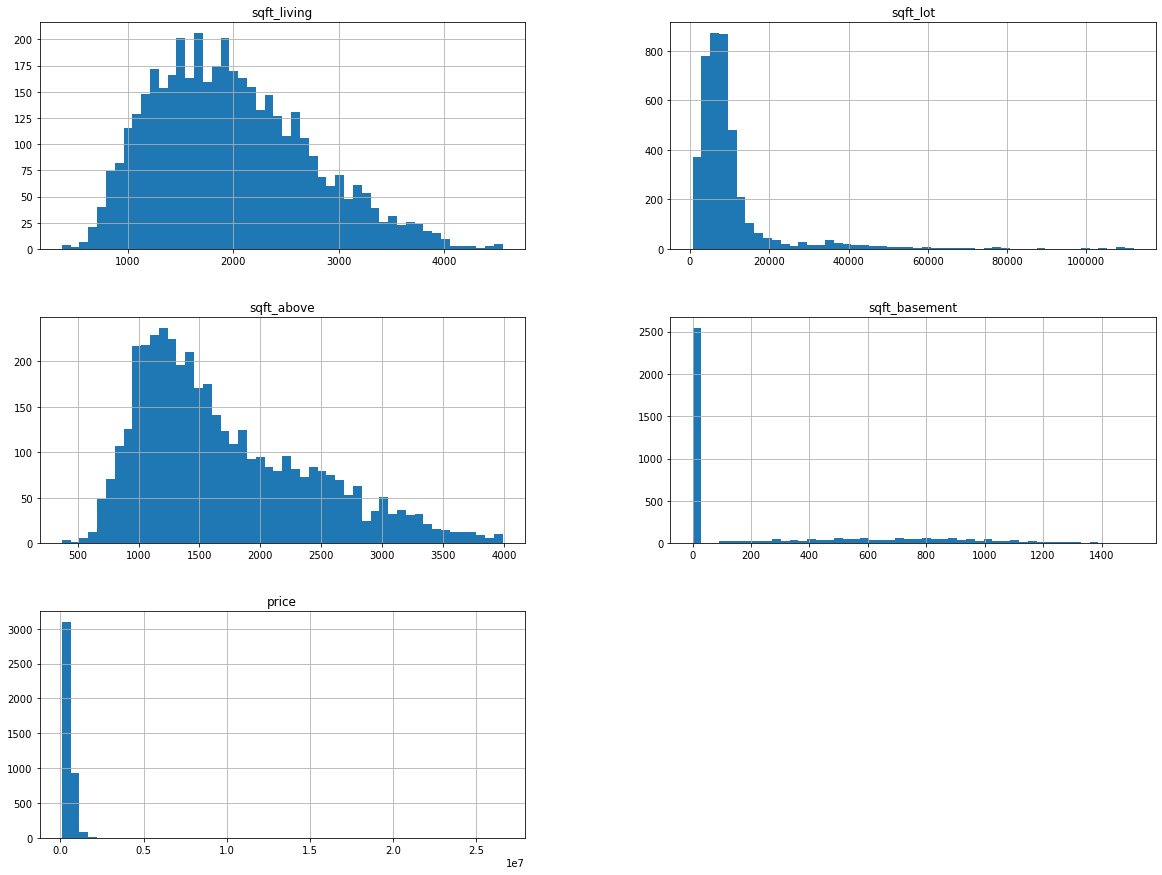

In [ ]:
# Plotting univariate distribution of continuous features after outlier removal

new_df.hist(column = cont_features + ['price'], bins=50, figsize=(20,15))
plt.show()

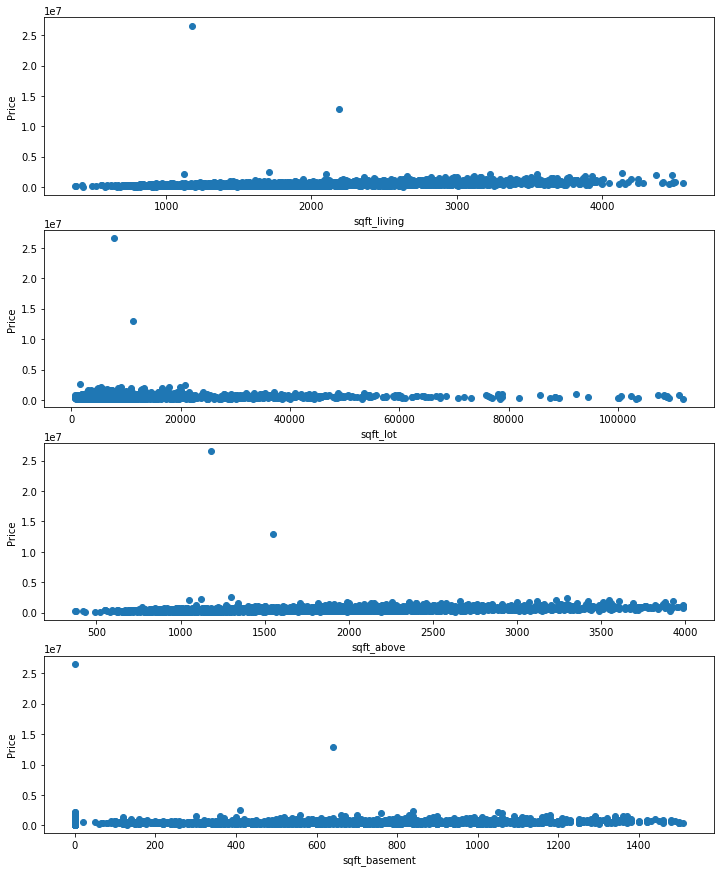

In [ ]:
# Plotting the continuous features vs the target feature

fig, axes = plt.subplots(len(cont_features), 1, figsize=(12,15))
index = 0
for i in range(len(cont_features)):
    axes[index].scatter(new_df[cont_features[index]], new_df.price)
    axes[index].set_xlabel(cont_features[index])
    axes[index].set_ylabel('Price')
    index = index + 1

In [ ]:
# Check if any attribute has any missing values
flag = True
for col in new_df.columns:
    missing_values = new_df[col].isnull().sum()
    if missing_values > 0:
        flag = False
        print("Column: " + col)
        print("Total missing values: " + str(missing_values))
if flag:
    print ("No attributes have missing values")

No attributes have missing values


In [ ]:
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [ ]:
non_num_features = ['street', 'city', 'statezip', 'country']
df_features = new_df.drop(columns=['price', 'date'])

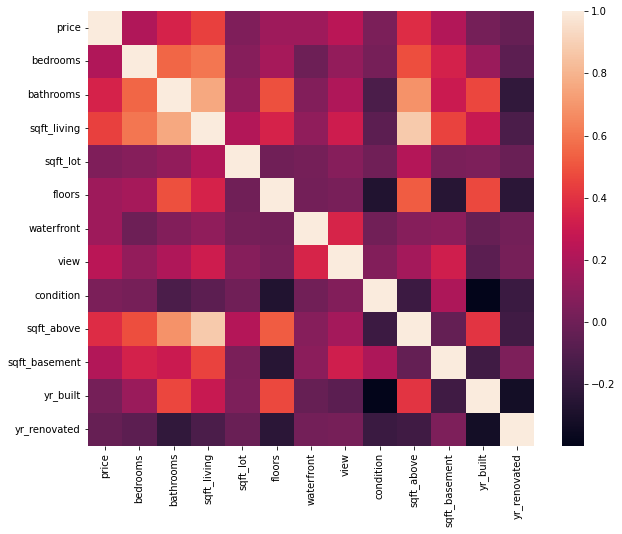

In [ ]:
corr = df.corr()

# Visualizing the correlation between the attributes

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

bathrooms, sqft_living and sqft_above are highly correlated with each other. It'll be worth keeping just one of these features. Going to pick sqft_living as it seems to encompass the other two features based on the actual data.

In [ ]:
# Looking deeper into the correlation of the features to price
corr['price']

price            1.000000
bedrooms         0.210228
bathrooms        0.341126
sqft_living      0.445494
sqft_lot         0.051347
floors           0.152758
waterfront       0.150083
view             0.242587
condition        0.038892
sqft_above       0.380661
sqft_basement    0.217782
yr_built         0.021757
yr_renovated    -0.029034
Name: price, dtype: float64

sqft_lot, condition, yr_built and yr_renovated have very low correlations with price. Should be able to drop it.

In [ ]:
df_features = df_features.drop(columns=['bathrooms', 'sqft_above', 'sqft_lot', 'yr_built', 'yr_renovated'])
for x in ['sqft_above', 'sqft_lot']:
    cont_features.remove(x)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'), non_num_features)],
    remainder='passthrough'
)

In [ ]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split

y = new_df['price']

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, random_state=42)
X_train = ct.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

import numpy as np

X_test = ct.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(np.mean(cross_val_score(lin_reg, X_test, y_test)))

ridge = RidgeCV().fit(X_train, y_train)
print(ridge.score(X_test, y_test))

lasso = LassoCV().fit(X_train, y_train)
print(lasso.score(X_test, y_test))

en = ElasticNetCV().fit(X_train, y_train)
print(en.score(X_test, y_test))

0.7200897372324571
0.6517953778049802
0.3963729508270264
0.3750323985898302


Based on the cross validation score, we can see that the linear regression performed pretty well with the non standardized data, with Ridge regression right after it. The Lasso and ElasticNet regressions performed with fairly low scores on standardized data.

In [ ]:
# Trying again after standardizing

from sklearn.preprocessing import StandardScaler

ct2 = ColumnTransformer(
    [
        ("StandardScalar", StandardScaler(), cont_features),
        ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'), non_num_features),
    ],
        remainder='passthrough'
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, random_state=42)
X_train = ct2.fit_transform(X_train)
X_test = ct2.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(np.mean(cross_val_score(lin_reg, X_test, y_test)))

ridge = RidgeCV().fit(X_train, y_train)
print(ridge.score(X_test, y_test))

lasso = LassoCV().fit(X_train, y_train)
print(lasso.score(X_test, y_test))

en = ElasticNetCV().fit(X_train, y_train)
print(en.score(X_test, y_test))

0.7201064694290041
0.6520047196128747
0.7469764251954193
0.003713607395216423


Standardizing the dataset significantly improved the scores of Lasso regression making it, and Linear regression, the better models for this use case. It did however, worsen the ElasticNet score and had minimal effect on the linear and Ridge regression scores.

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

data = fetch_openml('credit-g', version=1)
df = data['frame']
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
df.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
class                     category
dtype: object

In [ ]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
# credit_amount is the only continous feature of the data set as the feature can be represented by an infinite number of values. The other features are represented by a limited, discrete set of values.
cont_features = ["credit_amount"]
cat_features = ['checking_status', 'age', 'duration', 'credit_history', 'purpose', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'existing_credits', 'other_payment_plans', 'housing', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']

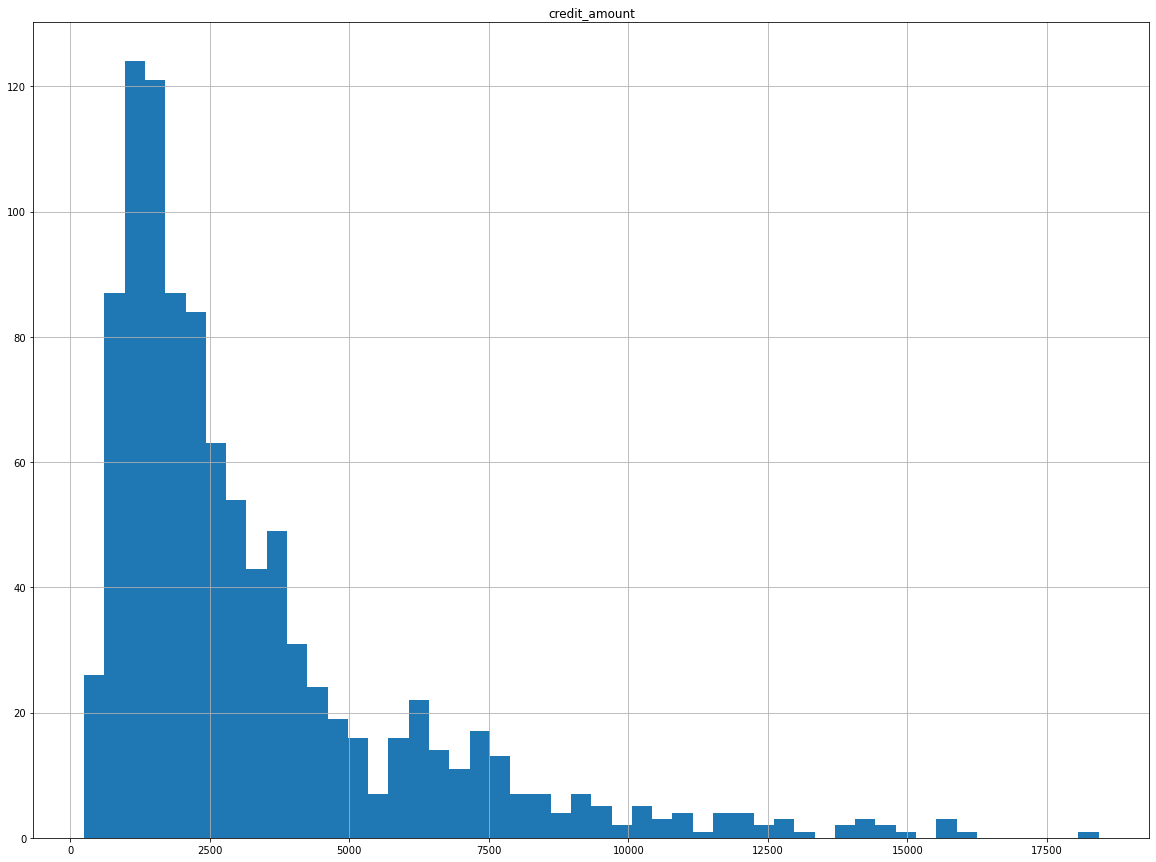

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(column = cont_features, bins=50, figsize=(20, 15))
plt.show()

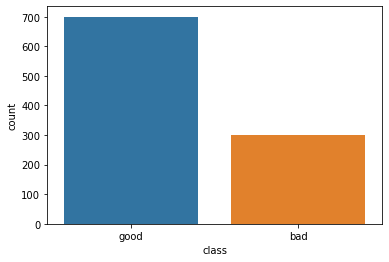

In [ ]:
# Univariate distribution of target feature.

import seaborn as sns
sns.countplot(x= 'class', data=df)
plt.show()

In [ ]:
# Check if any attribute has any missing values
flag = True
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values > 0:
        flag = False
        print("Column: " + col)
        print("Total missing values: " + str(missing_values))
if flag:
    print ("No attributes have missing values")

No attributes have missing values


In [ ]:
# For logistic regression, we will need to encode the non numeric features with a numeric value.
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
non_numeric_features = ["checking_status", "credit_history", "purpose", "savings_status", "employment", "personal_status", "other_parties", "property_magnitude", "other_payment_plans", "housing", "job", "own_telephone", "foreign_worker"]
df_features = df.drop(columns=['class']) # Dropping the target column from the set of features

for f in non_numeric_features:
    label = le.fit_transform(df[f])
    df_features[f] = label

df_features.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,4.0,3,67.0,1,1,2.0,1,1.0,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,2.0,3,22.0,1,1,1.0,1,1.0,0,1
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,3.0,3,49.0,1,1,1.0,3,2.0,0,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,4.0,1,45.0,1,0,1.0,1,2.0,0,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,4.0,2,53.0,1,0,2.0,1,2.0,0,1


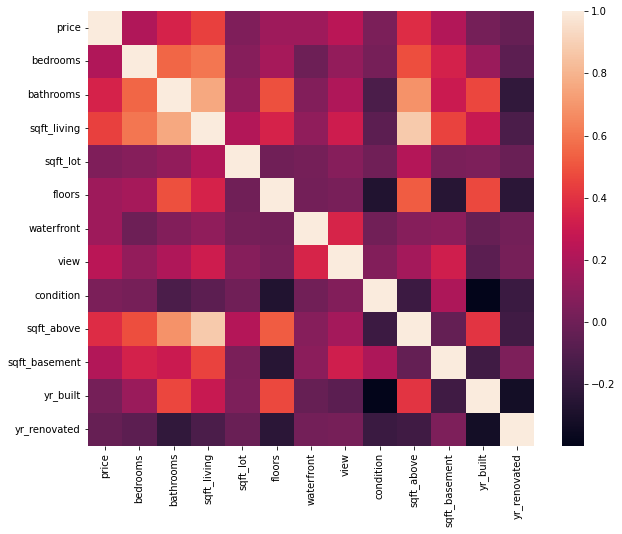

In [ ]:
import seaborn as sns

corr = df.corr()

# Visualizing the correlation between the attributes

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [ ]:
# It looks like credit amount and duration are highly correlated. Makes sense to drop one of the two features. This actually increases the accuracy of the logistic regression model.
df_features = df_features.drop(columns=['credit_amount'])

In [ ]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split

y =  LabelEncoder().fit_transform(df['class'])

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(max_iter= 500).fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.73


Initial run of the logistic regression model got a score of 0.73.

In [ ]:
# Now trying with ColumnTransformer and OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("OneHotEncoder", OneHotEncoder(sparse=False, handle_unknown='ignore'), non_numeric_features)],
    remainder='passthrough'
)

df_features = df.drop(columns=['class', 'credit_amount'])
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=42)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegressionCV(max_iter=1000).fit(X_train, y_train)
print(lr.score(X_test, y_test))

svc = LinearSVC().fit(X_train, y_train)
print(svc.score(X_test, y_test))

kneighbors = KNeighborsClassifier().fit(X_train, y_train)
print(kneighbors.score(X_test,y_test))

0.79
0.73
0.655


/Users/abhishekdhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


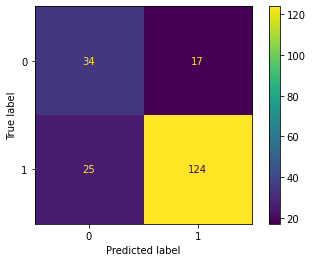

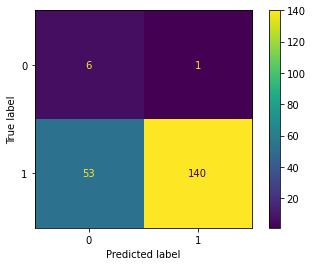

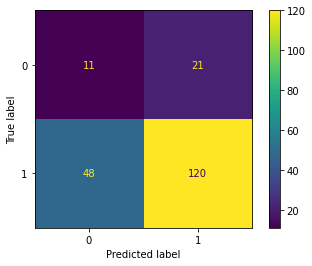

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lr_pred = lr.predict(X_test)
svc_pred = svc.predict(X_test)
k_pred = kneighbors.predict(X_test)

for pred in [lr_pred, svc_pred, k_pred]:
    cm = confusion_matrix(pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

plt.show()

The logistic regression model is most accurate of the three. However, the Linear SVC model was able to correctly predict more true positives than the other two models.

In [ ]:
# Let's scale all the numerical features to their standards
num_features = ["duration", "installment_commitment", "residence_since", "existing_credits", "age"]
from sklearn.preprocessing import StandardScaler

ct2 = ColumnTransformer(
    [
        ("StandardScalar", StandardScaler(), num_features),
        ("OneHotEncoder", OneHotEncoder(sparse=False, handle_unknown='ignore'), non_numeric_features),
    ],
        remainder='passthrough'
)

df_features = df.drop(columns=['class', 'credit_amount'])
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=42)
X_train = ct2.fit_transform(X_train)
X_test = ct2.transform(X_test)

In [ ]:
lr = LogisticRegressionCV(max_iter= 1000).fit(X_train, y_train)
print(lr.score(X_test, y_test))

svc = LinearSVC().fit(X_train, y_train)
print(svc.score(X_test, y_test))

kneighbors = KNeighborsClassifier().fit(X_train, y_train)
print(kneighbors.score(X_test,y_test))

0.76
0.795
0.74


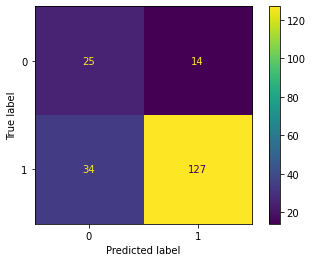

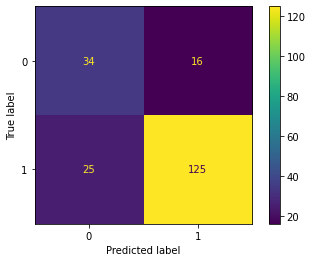

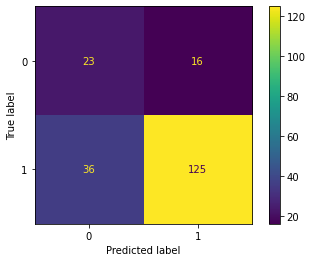

In [ ]:
lr_pred_2 = lr.predict(X_test)
svc_pred_2 = svc.predict(X_test)
k_pred_2 = kneighbors.predict(X_test)

for pred in [lr_pred_2, svc_pred_2, k_pred_2]:
    cm = confusion_matrix(pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot()

plt.show()

Standard Scaling reduces the score for the logistic regression model but increases the scores for the other two models. All three have similar True positive and True Negative counts.